In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [15]:
import os

# Specify the folder path
folder_path = 'data/india_fno_daily/daily/'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

print(len(csv_files))


134


/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T/ipykernel_2602/2155828387.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


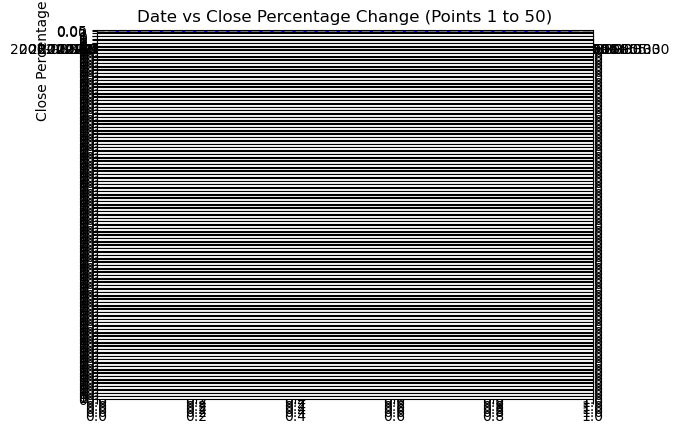

In [29]:
pnl = 0
pnl_list = {}

for each_file in csv_files:
    df = pd.read_csv('data/india_fno_daily/daily/'+each_file)
    df['close_pct'] = df['Close'].pct_change()
    df['prev_close_pct'] = df['close_pct'].shift(1)
    
    signal = 0
    entry_price = 0
    sl_p_pct = 0.03
    
    points_per_plot = 50
    num_plots = len(df) // points_per_plot + (1 if len(df) % points_per_plot else 0)

    # Plot each segment in a separate subplot
    fig, axes = plt.subplots(num_plots, 1)

    for i in range(num_plots):
        start = i * points_per_plot
        end = start + points_per_plot
        segment = df.iloc[start:end]

        ax = axes[i] if num_plots > 1 else axes  # Handle single subplot case
        ax.plot(segment['Date'], segment['close_pct'], marker='o', linestyle='-', color='b')
        ax.axhline(y=0, color='gray', linestyle='--')  # Add horizontal line at 0
        ax.set_xlabel('Date')
        ax.set_ylabel('Close Percentage Change')
        ax.set_title(f'Date vs Close Percentage Change (Points {start + 1} to {min(end, len(df))})')
        ax.grid()
        break

    plt.tight_layout()
    plt.show()
    break
    
    
    
    for i, row in df.iterrows():
        if row['Date'] < '2024-01-01':
            continue
    
        if signal == 0 and row['close_pct'] > 0 and row['close_pct'] > row['prev_close_pct']:
            signal = 1
            entry_price = row['Close']
        elif signal == 0 and row['close_pct'] < 0 and row['close_pct'] < row['prev_close_pct']:
            signal = -1
            entry_price = row['Close']
        
    ## SL
        elif signal == 1 and row['Low'] < (entry_price - entry_price*sl_p_pct):
            signal = 0
            pnl_trade = - (entry_price*0.05)
            pnl += pnl_trade
            pnl_list[row['Date']] = pnl
    
        elif signal == -1 and row['High'] > (entry_price + entry_price*sl_p_pct):
            signal = 0
            pnl_trade = -(entry_price*0.05)
            pnl += pnl_trade
            pnl_list[row['Date']] = pnl
        
    ## profit
        elif signal == 1 and row['High'] > (entry_price + entry_price*sl_p_pct):
            signal = 0
            pnl_trade =  (entry_price*0.05)
            pnl += pnl_trade
            pnl_list[row['Date']] = pnl
    
        elif signal == -1 and row['Low'] < (entry_price - entry_price*sl_p_pct):
            signal = 0
            pnl_trade = (entry_price*0.05)
            pnl += pnl_trade
            pnl_list[row['Date']] = pnl
    


In [23]:
pnl

-4793.442138338077

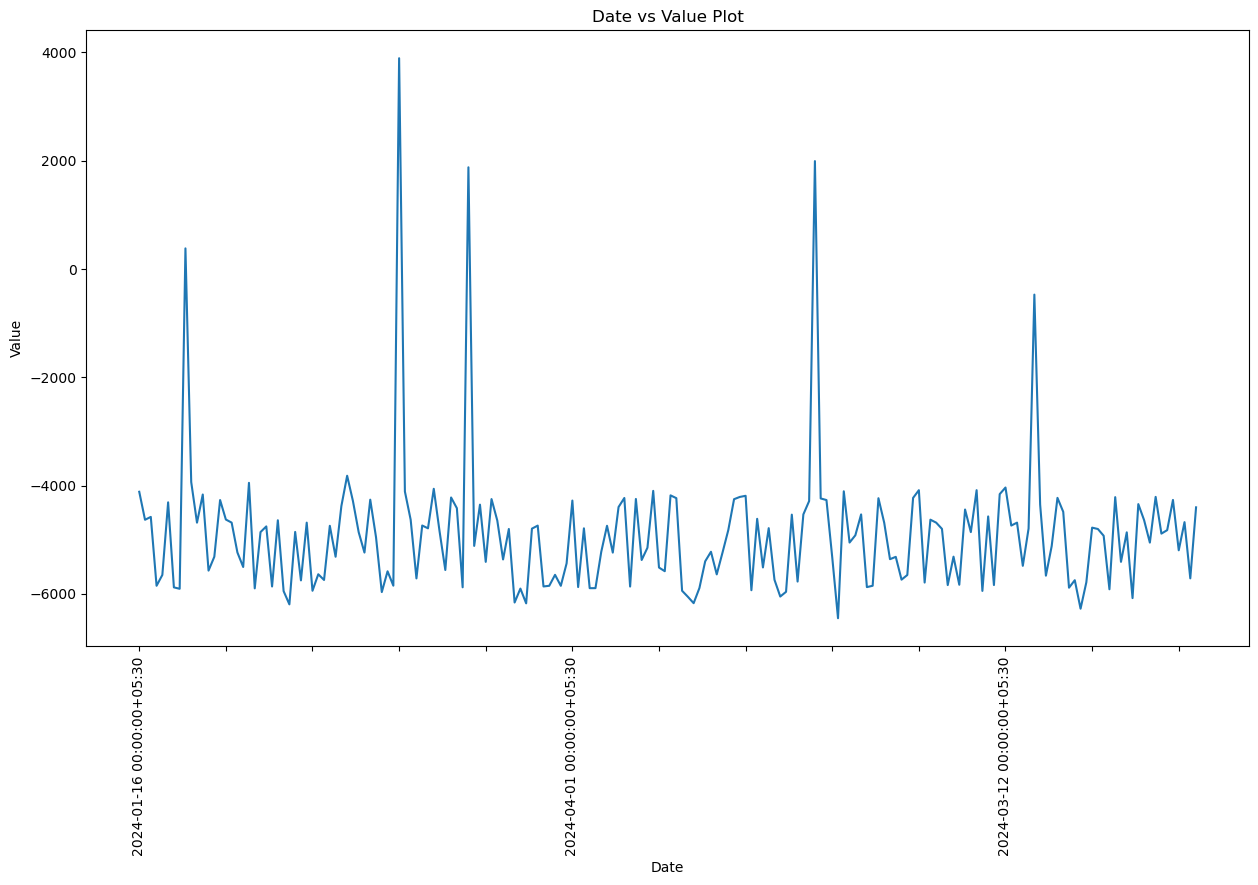

In [25]:
pnl_df = pd.DataFrame(list(pnl_list.items()), columns=['Date', 'Value'])
pnl_df.set_index('Date', inplace=True)

plt.figure(figsize=(15, 8))
pnl_df['Value'].plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Date vs Value Plot')
plt.xticks(rotation=90)

# Optional: Set the frequency of x-axis ticks to show all dates if necessary
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(pnl_df) // 10))

# for i in range(0, len(pnl_df), 20):
#     plt.axvline(x=pnl_df.index[i], color='gray', linestyle='--', linewidth=0.5)
    
plt.show()